In [1]:
!pwd

/home/yiyi/Documents/computerlinguistik-master/ss2019/semantik2/project/cdl


In [2]:
pred_arg_types_binary= '/home/yiyi/Documents/computerlinguistik-master/ss2019/semantik2/project/data/pred_arg_types_binary.json'


In [3]:
import json
import numpy as np
from collections import defaultdict, Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
def extract_all_argument_pairs(pred_arg_types_binary):
    with open(pred_arg_types_binary) as fp:
        pred_arg_types_binary_dict= json.load(fp)
        
    pred_arg_types_dict={}    # for each pred, {(loc, pers):[(mc,ls),(us, luis)...]}
    
    pred_args_dict=defaultdict(list) # {'star':[(mc,ls),(us,luis)...]}
    pred_arg_types_distribution={}
    
    arg_all=[]
    type_all=[]
    arg_pairs_all=[]
    type_pairs_all=[]
    for pred, args_dict in pred_arg_types_binary_dict.items():
        type_arg_dict=defaultdict(list)
        arg_pairs=[]
        type_pairs=[]
        for line  in args_dict:
            arg_pair=[]
            types=[]
            
            for index, words_type in sorted(line.items()):
                word, type= words_type
                types.append(type)
                type_all.append(type)
                arg_pair.append(word.lower())
                arg_all.append(word.lower())
            if len(arg_pair)==2:
                arg_pairs.append(tuple(arg_pair))
                type_pairs.append(tuple(types))
                
            if len(arg_pair)==3:
                arg_pairs.append(tuple((arg_pair[0], arg_pair[1])))
                arg_pairs.append(tuple((arg_pair[0], arg_pair[2])))
                type_pairs.append(tuple((types[0], types[1])))
                type_pairs.append(tuple((types[0], types[2])))
            
            if len(arg_pair)==4:
                arg_pairs.append(tuple((arg_pair[0], arg_pair[1])))
                arg_pairs.append(tuple((arg_pair[0], arg_pair[2])))
                arg_pairs.append(tuple((arg_pair[0], arg_pair[3])))
                type_pairs.append(tuple((types[0], types[1])))
                type_pairs.append(tuple((types[0], types[2])))
                type_pairs.append(tuple((types[0], types[3])))
                
        pred_args_dict[pred].extend(arg_pairs)
        
        arg_pairs_all.extend(arg_pairs)
        type_pairs_all.extend(type_pairs)
        
        first_types=[type_pair[0] for type_pair in type_pairs]
        second_types=[type_pair[1] for type_pair in type_pairs]
        
        first_types_counter= Counter(first_types)
        second_types_counter = Counter(second_types)
        pred_arg_types_distribution[pred]={
            'arg0_type':{type_:freq/len(first_types) for type_, freq in first_types_counter.items() },
            'arg1_type':{type_:freq/len(second_types) for type_, freq in second_types_counter.items() }
        }
        
        
        for idx, type_pair in enumerate(type_pairs):
            type_arg_dict[type_pair].append(arg_pairs[idx])
        
        pred_arg_types_dict[pred]=type_arg_dict
    
    pred_type_arg_freq={}
    for pred, type_arg_dict in pred_arg_types_dict.items():
        types_arg_counter={}
        for type_, args in type_arg_dict.items():
            types_arg_counter[type_]=Counter(args)
        pred_type_arg_freq[pred]= types_arg_counter
    return arg_pairs_all, type_pairs_all, arg_all, type_all,  pred_type_arg_freq, pred_arg_types_distribution, pred_args_dict

In [5]:
arg_pairs, type_pairs,arg_all, type_all, pred_arg_types_dict, pred_arg_types_distribution, pred_args_dict = extract_all_argument_pairs(pred_arg_types_binary)
unique_arg_pairs=list(set(arg_pairs))
len(unique_arg_pairs),len(arg_pairs), len(set(type_pairs)), len(pred_arg_types_dict), len(pred_args_dict['star'])

(14859, 15442, 16, 1418, 50)

In [67]:
pred_arg_types_dict

{'star': {('PER',
   'MISC'): Counter({('pierce brosnan', 'die another day'): 1,
           ('bixby', 'the magician'): 1,
           ('michael gough', 'batman & robin'): 1,
           ('dougray scott', 'enigma'): 1,
           ('thornton', 'eagle eye'): 1,
           ('kaye', 'the danny kaye show'): 1,
           ('myrna loy', 'the mask of fu manchu'): 1,
           ('charles bronson', 'death wish'): 1,
           ('tammy grimes', 'the prime of miss jean brodie'): 1,
           ('bette davis', 'marked woman'): 1,
           ('goldie hawn', 'private benjamin'): 1,
           ('bowie', 'the hunger'): 1,
           ('sidney poitier', 'to sir with love'): 1,
           ('masao inoue', 'a page of madness'): 1,
           ('barney rubble', 'the flintstones'): 1,
           ('peter fonda', 'the passion of ayn rand'): 1,
           ('jason schwartzman', 'slackers'): 1,
           ('robin williams', 'jack'): 1,
           ('kelly', 'rear window'): 1,
           ('raquel welch', 'one million yea

In [ ]:
arg_types_dict=defaultdict(list)
for arg, type_ in zip(arg_all, type_all):
    arg_types_dict[arg].append(type_)
    
# arg_type_dict={ arg: type_ for arg, type_ in zip(arg_all, type_all)}
# arg_type_dict

In [8]:
arg_types_prob_dict={}
for arg, types in arg_types_dict.items():
    type_dict=Counter(types)
    total = len(types)
    prob_dict={key:float("{0:.2f}".format(value/total)) for key, value in type_dict.items()}
    arg_types_prob_dict[arg]= prob_dict
    
arg_types_prob_dict

{'pierce brosnan': {'PER': 1.0},
 'die another day': {'MISC': 1.0},
 'bixby': {'PER': 1.0},
 'the magician': {'MISC': 1.0},
 'lou ferrigno': {'PER': 1.0},
 'hulk': {'PER': 1.0},
 'mariette hartley': {'PER': 1.0},
 'michael gough': {'PER': 1.0},
 'batman & robin': {'MISC': 1.0},
 'dougray scott': {'PER': 1.0},
 'enigma': {'MISC': 1.0},
 'abc': {'ORG': 0.86, 'MISC': 0.14},
 'sayers': {'PER': 1.0},
 'thornton': {'PER': 1.0},
 'eagle eye': {'MISC': 1.0},
 'doctor': {'MISC': 1.0},
 'doctor who serials': {'MISC': 1.0},
 'batman': {'MISC': 0.46, 'PER': 0.54},
 'michael keaton': {'PER': 1.0},
 'adrian paul': {'PER': 1.0},
 'duncan macleod': {'PER': 1.0},
 'kaye': {'PER': 1.0},
 'the danny kaye show': {'MISC': 1.0},
 'myrna loy': {'PER': 1.0},
 'the mask of fu manchu': {'MISC': 1.0},
 'copycat': {'MISC': 1.0},
 'sigourney weaver': {'PER': 1.0},
 'charles bronson': {'PER': 1.0},
 'death wish': {'MISC': 1.0},
 'tammy grimes': {'PER': 1.0},
 'the prime of miss jean brodie': {'MISC': 1.0},
 'clevel

In [9]:
len(arg_types_prob_dict)

15780

In [7]:
# pred_arg_types_distribution

In [11]:
args2id= {pair:idx for idx, pair in enumerate(unique_arg_pairs)}
id2args={idx:pair for idx, pair in enumerate(unique_arg_pairs)}
len(args2id)

14859

In [9]:
predicates=pred_arg_types_dict.keys()
len(predicates)

1418

In [10]:
ls=[0 for i in range(len(args2id))]

In [11]:
len(ls)

14859

In [34]:
# arg_type_dict={arg:type}
# vectors with augmentation
vector_dict={}
for pred, type_pair_dict in pred_arg_types_dict.items():
    type_vector_dict={}
    print(pred)
    ## if applied 
    arg_type_distribution_dict=pred_arg_types_distribution[pred]
    print(type_pair_dict)

    for type_pair, arg_counter in type_pair_dict.items():
        vector_list=[0 for i in range(len(args2id))]
        type0, type1 = type_pair
        # initialization with the predictions
        for idx, args in id2args.items():
            arg0, arg1 = args
            prob_dict0, prob_dict1= arg_types_prob_dict[arg0], arg_types_prob_dict[arg1]
            joint_distribution = prob_dict0.get(type0,0)* prob_dict1.get(type1,0)
            vector_list[idx] = joint_distribution
            # print(prob_dict0, prob_dict1)
            # type1, type2 = arg_type_dict[arg0], arg_type_dict[arg1]
            
#             type1_prob = arg_type_distribution_dict['arg0_type'].get(type0,0)
#             type2_prob = arg_type_distribution_dict['arg1_type'].get(type1,0)
#             vector_list[idx]=  type1_prob* type2_prob+ joint_distribution

        
        # which has the arg_pair in typed_predicate
        for arg_pair, freq in arg_counter.items():            
            vector_list[args2id[arg_pair]] += freq 
            
        # type_vector_dict[type_pair]=np.asarray(vector_list)
        pred_type_pair=pred+'-'+type_pair[0]+'-'+type_pair[1]
        vector_dict[pred_type_pair]= np.asarray(vector_list)
        

star
{('PER', 'MISC'): Counter({('pierce brosnan', 'die another day'): 1, ('bixby', 'the magician'): 1, ('michael gough', 'batman & robin'): 1, ('dougray scott', 'enigma'): 1, ('thornton', 'eagle eye'): 1, ('kaye', 'the danny kaye show'): 1, ('myrna loy', 'the mask of fu manchu'): 1, ('charles bronson', 'death wish'): 1, ('tammy grimes', 'the prime of miss jean brodie'): 1, ('bette davis', 'marked woman'): 1, ('goldie hawn', 'private benjamin'): 1, ('bowie', 'the hunger'): 1, ('sidney poitier', 'to sir with love'): 1, ('masao inoue', 'a page of madness'): 1, ('barney rubble', 'the flintstones'): 1, ('peter fonda', 'the passion of ayn rand'): 1, ('jason schwartzman', 'slackers'): 1, ('robin williams', 'jack'): 1, ('kelly', 'rear window'): 1, ('raquel welch', 'one million years b.c.'): 1, ('shirley maclaine', 'sweet charity'): 1, ('james nesbitt', 'bloody sunday'): 1, ('james mason', 'odd man out'): 1, ('theron', 'the danish girl'): 1, ('tallulah bankhead', 'tarnished lady'): 1, ('anthon

In [13]:
len(vector_dict.keys())

4560

In [35]:
vector_dict

{'star-PER-MISC': array([0., 0., 0., ..., 0., 1., 0.]),
 'star-PER-PER': array([0., 1., 0., ..., 0., 0., 1.]),
 'star-ORG-PER': array([0., 0., 0., ..., 0., 0., 0.]),
 'star-MISC-MISC': array([0., 0., 0., ..., 0., 0., 0.]),
 'star-MISC-PER': array([0., 0., 0., ..., 0., 0., 0.]),
 'star-LOC-MISC': array([0., 0., 0., ..., 0., 0., 0.]),
 'star-PER-LOC': array([0. , 0. , 0. , ..., 0.1, 0. , 0. ]),
 'star-PER-ORG': array([0. , 0. , 1. , ..., 0.9, 0. , 0. ]),
 'be-ORG-ORG': array([0., 0., 0., ..., 0., 0., 0.]),
 'be-LOC-MISC': array([0., 0., 0., ..., 0., 0., 0.]),
 'be-PER-MISC': array([0., 0., 0., ..., 0., 1., 0.]),
 'be-PER-LOC': array([0. , 0. , 0. , ..., 0.1, 0. , 0. ]),
 'be-ORG-LOC': array([0., 0., 0., ..., 0., 0., 0.]),
 'be-PER-PER': array([0., 1., 0., ..., 0., 0., 1.]),
 'be-PER-ORG': array([0. , 0. , 1. , ..., 0.9, 0. , 0. ]),
 'be-MISC-MISC': array([0., 0., 0., ..., 0., 0., 0.]),
 'be-LOC-LOC': array([2., 0., 0., ..., 0., 0., 0.]),
 'be-MISC-PER': array([0., 0., 0., ..., 0., 0., 0.

In [36]:
# without augmentation
vector_pred={}
for pred, arg_pair_list in pred_args_dict.items():
    vector_list=[0 for i in range(len(args2id))]
    for arg_pair in arg_pair_list:
        vector_list[args2id[arg_pair]]+=1
    vector_pred[pred]=np.asarray(vector_list)

In [20]:
keys_pred= []
matrix_pred= []
for key, vector in vector_pred.items():
    keys_pred.append(key)
    matrix_pred.append(vector)

In [21]:
features_pred = np.vstack(matrix_pred)
features_pred.shape

(1418, 14859)

In [22]:
label2id_pred={label:idx for idx, label in enumerate(keys_pred)}
id2label_pred={idx:label for idx, label in enumerate(keys_pred)}
labels_pred= np.array(keys_pred)
labels_pred.shape

(1418,)

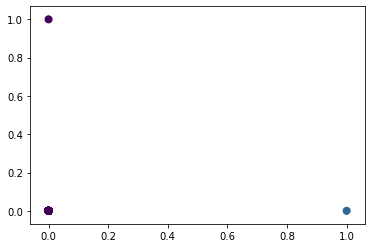

In [23]:
from sklearn.cluster import KMeans
from scipy import sparse

kmeans_pred= KMeans(n_clusters=4)
kmeans_pred.fit(features_pred)
y_kmeans_pred= kmeans_pred.predict(features_pred)
plt.scatter(features_pred[:, 0], features_pred[:, 1],  c=y_kmeans_pred, s=50, cmap='viridis')

In [43]:
# augmented data
keys= []
matrix= []
for key, vector in vector_dict.items():
    keys.append(key)
    matrix.append(vector)
    

In [38]:
features=np.vstack(matrix)
features.shape

(4560, 14859)

In [39]:
label2id={label:idx for idx, label in enumerate(keys)}
id2label={idx:label for idx, label in enumerate(keys)}

In [40]:
labels=np.asarray(keys)
labels.shape

(4560,)

In [23]:
lists=[[10.63,20.63,10.63,0,0.27],[0.25,0.25,0.25,10.12,0.63],[0.25,0.25,0.25,0.12,5.63]]
darray= np.asarray(lists)
df = pd.DataFrame(darray)
# df
# df = df.rename(index=)
args= [ ("Shakespeare", "Macbeth") , ("Dickens", "Oliver Twist") , ("Rowling", "Harry Potter") , ("Council", "Dublin"), ("Sharon", "Ronnie")]
deargs={idx:args for idx, args in enumerate(args)}
df=df.rename(columns=deargs)
df=df.rename(index= {0:"write_{arg0:PER,arg1:Book}",1:"suggest_{arg0:ORG, arg1:LOC}",2:"suggest_{arg0:PER, arg1:PER}"})

df

,"(Shakespeare, Macbeth)","(Dickens, Oliver Twist)","(Rowling, Harry Potter)","(Council, Dublin)","(Sharon, Ronnie)"
"write_{arg0:PER,arg1:Book}",10.63,20.63,10.63,0.00,0.27
"suggest_{arg0:ORG, arg1:LOC}",0.25,0.25,0.25,10.12,0.63
"suggest_{arg0:PER, arg1:PER}",0.25,0.25,0.25,0.12,5.63


In [24]:
df=df.rename(index= {0:"write_{arg0:PER,arg1:Book}",1:"suggest_{arg0:ORG, arg1:LOC}",2:"suggest_{arg0:PER, arg1:PER}"})


In [53]:
from sklearn.cluster import KMeans
from scipy import sparse

kmeans= KMeans(n_clusters=4)
kmeans.fit(features)
y_kmeans= kmeans.predict(features)


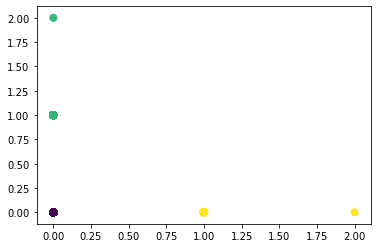

In [54]:
plt.scatter(features[:, 0], features[:, 1],  c=y_kmeans, s=50, cmap='viridis')

In [27]:
id2args

{0: ('harrison', 'john lennon'),
 1: ('german', 'languages of the european union'),
 2: ('j. m. coetzee', 'waiting for the barbarians'),
 3: ('finland', 'finland'),
 4: ('hypercard', 'violawww'),
 5: ('owendo', 'booué'),
 6: ('shimon peres', 'kadima'),
 7: ('john galt', 'atlas shrugged'),
 8: ('cpr', 'budd rail diesel cars'),
 9: ('brazil', 'renault'),
 10: ('jehosaphat', 'asa'),
 11: ('turku', 'finnish language'),
 12: ('soyuz rocket', 'french guiana'),
 13: ('euromonitor international', 'artistry'),
 14: ('dc', 'the spirit'),
 15: ('roger bacon', 'hebrew'),
 16: ('artemis', 'apollo'),
 17: ('audi', 'new york yankees'),
 18: ('european union', 'hungary'),
 19: ('kraków', 'roman catholic church'),
 20: ('dayton', 'united states'),
 21: ('european economic community', 'eu'),
 22: ('f-14', 'u.s. navy'),
 23: ('eighth avenue', 'broadway'),
 24: ('mamet', 'israel'),
 25: ('hurst', 'argentina'),
 26: ('davis', 'garfield'),
 27: ('palácio do planalto', 'brasília'),
 28: ('nhs scotland', 'abe

In [41]:
features_df = pd.DataFrame(features)
features_df = features_df.rename(columns= id2args)
features_df = features_df.rename(index= id2label)
features_df

,"(boc tower, hong kong)","(chaplin, chaplin)","(walter gropius, bauhaus)","(hawaii state supreme court, ali ʻ iōlani hale)","(thurgot, saint andrews)","(santiniketan, indian)","(goldwater, reagan)","(dostum, rabbani)","(coloman, béla)","(rockies, oakland athletics)",...,"(bali strait, java)","(brown, sarah macaulay)","(statenvertaling, dutch)","(sagan, aaas 's)","(spain, coimbra)","(france, cascade mountains)","(love, brian wilson)","(lenin, reds)","(kelly, daisy bell)","(mclean, lisa kindred)"
star-PER-MISC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0
star-PER-PER,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.00,0.38,0.0,0.0,0.00,0.00,0.78,0.0,0.0,1.0
star-ORG-PER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.62,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
star-MISC-MISC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
star-MISC-PER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.22,0.0,0.0,0.0
star-LOC-MISC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.43,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
star-PER-LOC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.04,0.00,0.1,0.0,0.0
star-PER-ORG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.9,0.0,0.0
be-ORG-ORG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
be-LOC-MISC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.43,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [31]:
features_df.describe()

,"(boc tower, hong kong)","(chaplin, chaplin)","(walter gropius, bauhaus)","(hawaii state supreme court, ali ʻ iōlani hale)","(thurgot, saint andrews)","(santiniketan, indian)","(goldwater, reagan)","(dostum, rabbani)","(coloman, béla)","(rockies, oakland athletics)",...,"(bali strait, java)","(brown, sarah macaulay)","(statenvertaling, dutch)","(sagan, aaas 's)","(spain, coimbra)","(france, cascade mountains)","(love, brian wilson)","(lenin, reds)","(kelly, daisy bell)","(mclean, lisa kindred)"
count,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,...,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000,4560.000000
mean,0.368470,0.421101,0.335575,0.368470,0.366277,0.321759,0.421101,0.421101,0.421101,0.336452,...,0.348384,0.351351,0.360136,0.335356,0.367020,0.368382,0.398233,0.338448,0.366715,0.421101
std,0.441300,0.526212,0.396665,0.441219,0.446298,0.376800,0.526537,0.526329,0.526154,0.391041,...,0.372012,0.381719,0.421119,0.395138,0.430529,0.433747,0.464179,0.382904,0.442747,0.526220
min,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,...,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,0.000769,0.000544,0.000544,0.000544
25%,0.060000,0.058594,0.056550,0.060000,0.055556,0.056700,0.058594,0.058594,0.058594,0.061224,...,0.062500,0.062422,0.061224,0.056550,0.063400,0.061676,0.062500,0.059978,0.055556,0.058594
50%,0.158095,0.160000,0.148148,0.158095,0.143694,0.147926,0.160000,0.160000,0.160000,0.156221,...,0.186170,0.173582,0.160000,0.148148,0.160000,0.160000,0.180833,0.165000,0.150000,0.160000
75%,0.500000,0.666667,0.500000,0.500000,0.500000,0.480000,0.666667,0.666667,0.666667,0.500000,...,0.535271,0.505000,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,0.500000,0.666667
max,2.187497,2.218750,3.317907,2.024707,2.116402,2.073333,3.000000,2.500000,2.079576,2.186981,...,2.249328,2.274675,2.044792,2.043836,2.163018,2.843600,1.780000,1.900000,2.666667,2.238095


### Augmented data

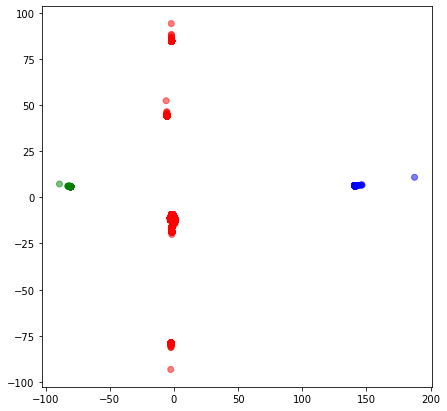

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(features)


pca = PCA(n_components=16)
x_7d = pca.fit_transform(X)

pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(X)

#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,3], c= label_color, alpha=0.5, cmap='viridis') 
plt.show()

In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(features_df)

pca4 = PCA(n_components=16)
x_4d = pca.fit_transform(X)

#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 4)

X_clustered= kmeans.fit(x_4d)
cluster_map = pd.DataFrame()
cluster_map['data_index']=features_df.index.values
cluster_map['cluster']=X_clustered.labels_

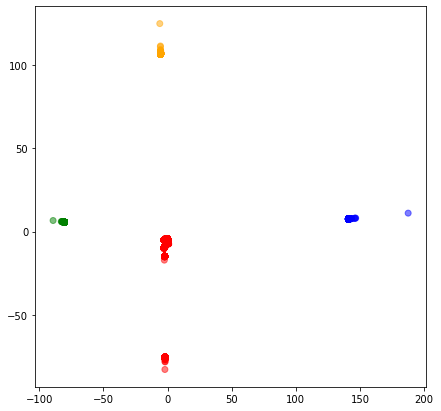

In [46]:

X = StandardScaler().fit_transform(features_df)

pca4 = PCA(n_components=16)
x_4d = pca.fit_transform(X)

#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 4)

#Define our own color map
X_clustered = kmeans.fit_predict(x_4d)
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3:'orange'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2],c= label_color, alpha=0.5, cmap='viridis') 
plt.show()



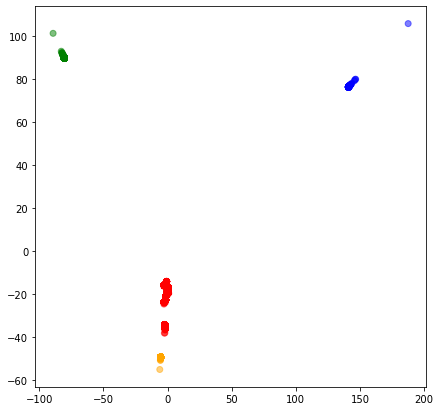

In [48]:
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,1],c= label_color, alpha=0.5, cmap='viridis') 
plt.show()


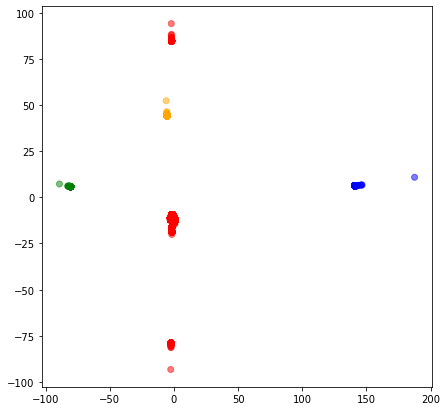

In [49]:
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,3],c= label_color, alpha=0.5, cmap='viridis') 
plt.show()


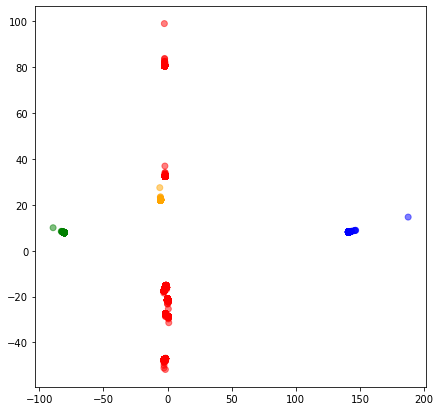

In [50]:
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,4],c= label_color, alpha=0.5, cmap='viridis') 
plt.show()


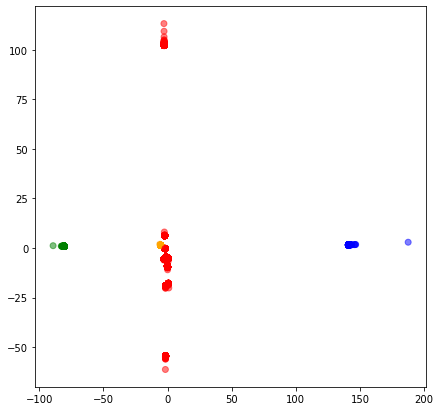

In [51]:
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,5],c= label_color, alpha=0.5, cmap='viridis') 
plt.show()


In [82]:
x_4d.shape

(4560, 16)

In [47]:
for i in range(0, 4):
    print(cluster_map[cluster_map.cluster==i])

                 data_index  cluster
16               be-LOC-LOC        0
35      established-LOC-LOC        0
48            carry-LOC-LOC        0
70             give-LOC-LOC        0
74             hold-LOC-LOC        0
93             have-LOC-LOC        0
106         consist-LOC-LOC        0
121            play-LOC-LOC        0
129          remain-LOC-LOC        0
145            lose-LOC-LOC        0
161            beat-LOC-LOC        0
165           clash-LOC-LOC        0
173       establish-LOC-LOC        0
185           leave-LOC-LOC        0
196     incorporate-LOC-LOC        0
213            lead-LOC-LOC        0
233           write-LOC-LOC        0
244           serve-LOC-LOC        0
300          follow-LOC-LOC        0
315           offer-LOC-LOC        0
322        separate-LOC-LOC        0
331          manage-LOC-LOC        0
335           cause-LOC-LOC        0
341            link-LOC-LOC        0
348          become-LOC-LOC        0
365         provide-LOC-LOC        0
3

## analysis explained variance measure

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(features)

In [40]:
X.shape

(4560, 14859)

In [41]:
mean_vec= np.mean(X, axis=0)
cov_mat= np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [42]:
eig_vals.shape

(14859,)

In [43]:
eig_vecs.shape

(14859, 14859)

In [57]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort from high to low
eig_pairs.sort(key=lambda  x:x[0], reverse=True)
tot= sum(eig_vals)
var_exp=[(i/tot)*100  for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # cumulative explained variance
var_exp

[(21.779132429600566+0j),
 (15.23378444502121+0j),
 (10.930851789580757+0j),
 (9.690065648808035+0j),
 (8.190966799578705+0j),
 (5.761317686462058+0j),
 (4.381647145256029+0j),
 (4.173206437347235+0j),
 (3.826808281415417+0j),
 (3.428680507056521+0j),
 (3.0524210924015756+0j),
 (2.6247075354640477+0j),
 (2.104967618545094+0j),
 (1.6967483466787159+0j),
 (1.6011670899345312+0j),
 (0.040378155756904004+0j),
 (0.039448444342027635+0j),
 (0.018367745696577623+0j),
 (0.01736506213226367+0j),
 (0.015850100739687956+0j),
 (0.014694563134223416+0j),
 (0.013507156299660266+0j),
 (0.013157879913510036+0j),
 (0.012984813150927844+0j),
 (0.011658991186187791+0j),
 (0.010598790049112931+0j),
 (0.010272476160700792+0j),
 (0.009738948769636987+0j),
 (0.009424796778210454+0j),
 (0.007543662824265896+0j),
 (0.00745705027041584+0j),
 (0.0068432158768995804+0j),
 (0.006487641381138787+0j),
 (0.006263815048689331+0j),
 (0.006103830615728684+0j),
 (0.006062239598000799+0j),
 (0.00569805395466136+0j),
 (0.0

/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


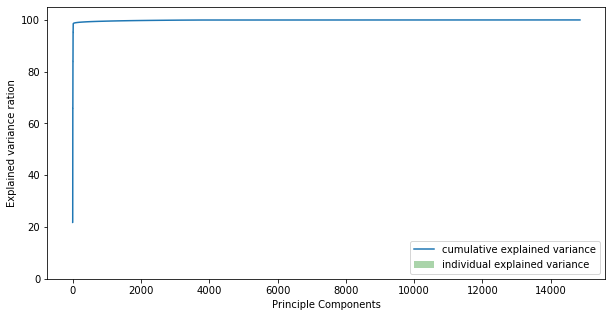

In [61]:
plt.figure(figsize= (10,5))
plt.bar(range(14859), var_exp, alpha=0.3333, align='center', label='individual explained variance', color='g')
plt.step(range(14859), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principle Components')
plt.legend(loc='best')
plt.show()

In [72]:
x_7d.shape, X_clustered.shape

((4560, 16), (4560,))

/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


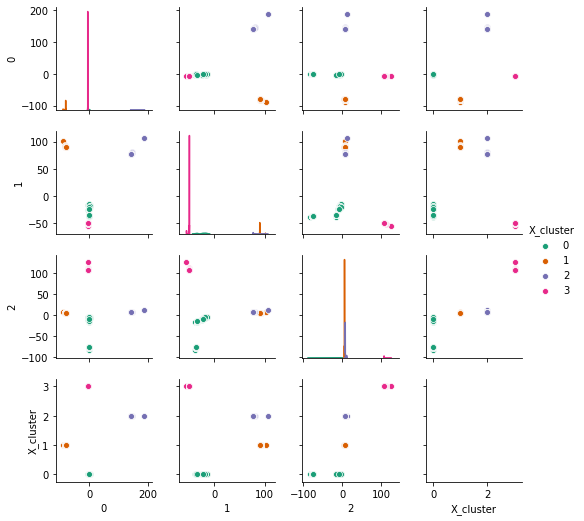

In [52]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_7d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

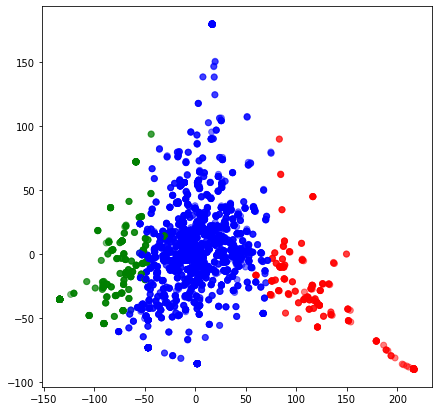

In [47]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()


In [48]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_4d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


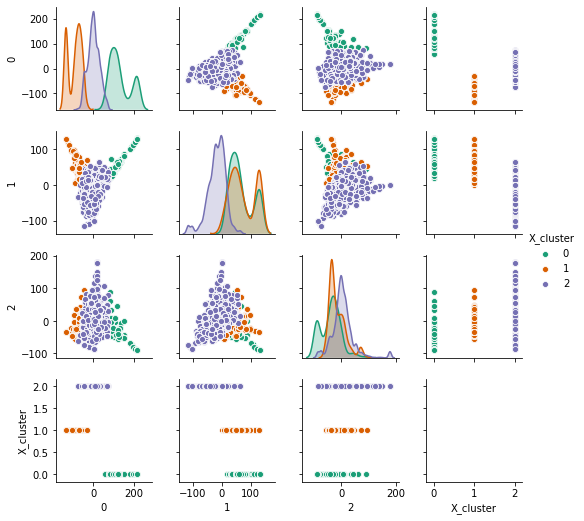

In [50]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## no-typed data

In [29]:
features_df_pred = pd.DataFrame(features_pred)
features_df_pred = features_df_pred.rename(columns= id2args)
features_df_pred = features_df_pred.rename(index= id2label_pred)
features_df_pred

,"(harrison, john lennon)","(german, languages of the european union)","(j. m. coetzee, waiting for the barbarians)","(finland, finland)","(hypercard, violawww)","(owendo, booué)","(shimon peres, kadima)","(john galt, atlas shrugged)","(cpr, budd rail diesel cars)","(brazil, renault)",...,"(porfirio díaz, guatemala)","(penguin classics, the dreams in the witch house and other weird stories)","(chaitin, kolmogorov)","(scotland yard, cooper)","(herschel grynszpan, paris)","(yeager, hunter)","(northeast corridor, northeast regional)","(soviets, nagy)","(south side, museum of science and industry)","(ballarat, ballarat)"
star,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
be,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
appoint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
established,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
carry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
give,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hold,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
express,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
have,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
consist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
features_df.where(features_df>1)

,"(boc tower, hong kong)","(chaplin, chaplin)","(walter gropius, bauhaus)","(hawaii state supreme court, ali ʻ iōlani hale)","(thurgot, saint andrews)","(santiniketan, indian)","(goldwater, reagan)","(dostum, rabbani)","(coloman, béla)","(rockies, oakland athletics)",...,"(bali strait, java)","(brown, sarah macaulay)","(statenvertaling, dutch)","(sagan, aaas 's)","(spain, coimbra)","(france, cascade mountains)","(love, brian wilson)","(lenin, reds)","(kelly, daisy bell)","(mclean, lisa kindred)"
star-PER-MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-PER-PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-ORG-PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-MISC-MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-MISC-PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-LOC-MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-PER-LOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star-PER-ORG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
be-ORG-ORG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
be-LOC-MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


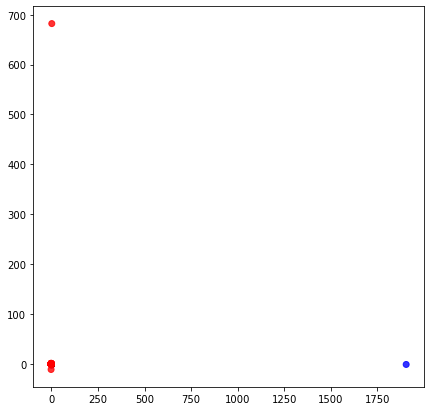

In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_pred = StandardScaler().fit_transform(features_pred)


pca4 = PCA(n_components=4)
x_4d = pca4.fit_transform(X_pred)

#Set a 3 KMeans clustering
kmeans_pred = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans_pred.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'b', 2: 'purple'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.8) 
plt.show()


In [48]:
X_pred = StandardScaler().fit_transform(features_pred)

pca4 = PCA(n_components=1)
x_4d = pca4.fit_transform(X_pred)

X_pred = StandardScaler().fit_transform(features_pred)
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

X_clustered= kmeans.fit(x_4d)
cluster_map = pd.DataFrame()
cluster_map['data_index']=features_df_pred.index.values
cluster_map['cluster']=X_clustered.labels_

In [70]:
cluster_map.shape

(1418, 2)

In [50]:
for i in range(0, 3):
    print(cluster_map[cluster_map.cluster==i])

        data_index  cluster
0             star        0
3      established        0
4            carry        0
5             give        0
7          express        0
10            play        0
13            beat        0
14           clash        0
15       establish        0
16           leave        0
17            snub        0
18            bury        0
19     incorporate        0
20          employ        0
22           write        0
23           serve        0
24            bear        0
25       introduce        0
26         condemn        0
27          oppose        0
28          repeal        0
29         deliver        0
31           offer        0
32            sink        0
33        separate        0
35           cause        0
39        continue        0
40       recommend        0
42         feature        0
43      contribute        0
...            ...      ...
1388    trailblaze        0
1389         judge        0
1390        pepper        0
1391          land  

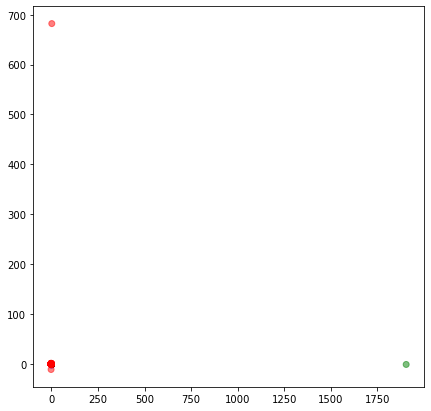

In [64]:

#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()


In [57]:


# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_4d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered


/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yiyi/anaconda3/envs/semantik/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


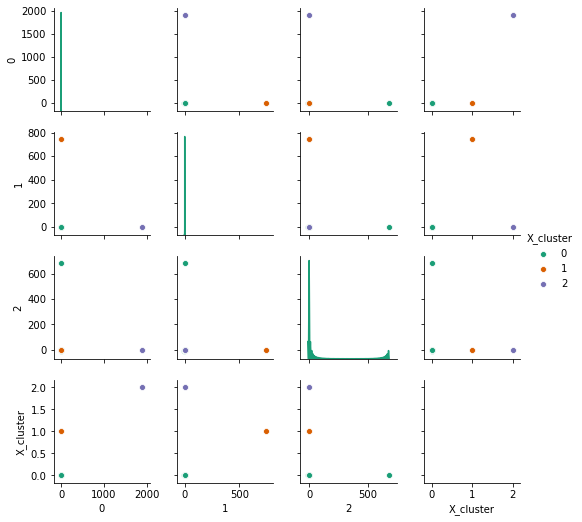

In [58]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
